In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from utils.eval import score
from utils.models import CentroidSMOTE
from utils.models import KNNModel
from imblearn.over_sampling import SMOTE

# Reading, Preprocessing and EDA

In [3]:
TRAIN_PATH = "../datasets/bitcoinheist-ransomware-dataset/BitcoinHeistData.csv"
train_df = pd.read_csv(TRAIN_PATH, header = 0)
train_df = train_df.drop(columns = ['address'])  
print("Done")

Done


In [4]:
print(train_df.isnull().sum().sum(), train_df.isna().sum().sum())

0 0


A quick galnce reveals it has no missing values.

In [5]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
print(dict((i, list_dtype.count(i)) for i in list_dtype))

{dtype('int64'): 6, dtype('float64'): 2, dtype('O'): 1}


The object type is the label dataset. Hence, there are no categorical columns.

In [6]:
print(train_df['label'].value_counts())

label
white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw        

In [7]:
labels_list = ['white', 'paduaCryptoWall', 'montrealCryptoLocker', 'princetonCerber', 'princetonLocky', 'montrealCryptXXX', 'others']

In [8]:
%%capture
for i in range(len(train_df['label'])):
    if train_df['label'][i] not in labels_list:
        train_df['label'][i] = 'others'

In [9]:
print(train_df['label'].value_counts())

label
white                   2875284
paduaCryptoWall           12390
montrealCryptoLocker       9315
princetonCerber            9223
princetonLocky             6625
montrealCryptXXX           2419
others                     1441
Name: count, dtype: int64


In [10]:
label_encoder = LabelEncoder()
i = 'label'
train_df[i] = label_encoder.fit_transform(train_df[i])    

In [11]:
scl = StandardScaler()
scl.fit(train_df)
scl.transform(train_df)
train_df, test_df = train_test_split(train_df, train_size = 0.9, random_state = 42) 
y_train = train_df['label']
y_test = test_df['label']
X_train = train_df.drop(['label'], axis = 1)
X_test = test_df.drop(['label'], axis = 1)

In [12]:
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier(metric='euclidean'))
])

parameters = {
    'classifier__n_neighbors' : [3, 5, 7, 9, 11],
}

In [13]:
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.986924
Error Rate: 0.01307642198374881
Precision: 0.567499
Recall: 0.358495
F1-score: 0.396948
Selectivity: 0.886105
Balanced Accuracy: 0.358495
Geometric Mean: 0.563617


/opt/conda/envs/knn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


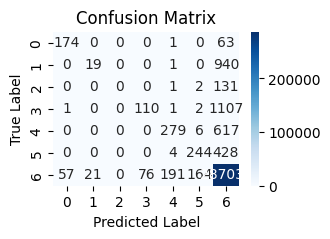

In [14]:
clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
score(X_test, y_test, best_clf)

Resampled dataset shape Counter({6: 2587745, 5: 2587745, 3: 2587745, 0: 2587745, 1: 2587745, 4: 2587745, 2: 2587745})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.535910
Error Rate: 0.46408955326224843
Precision: 0.176264
Recall: 0.474943
F1-score: 0.159552
Selectivity: 0.880758
Balanced Accuracy: 0.474943
Geometric Mean: 0.646769


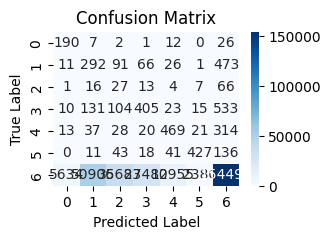

Resampled dataset shape Counter({6: 2587745, 5: 2587745, 3: 2587745, 0: 2587745, 1: 2587745, 4: 2587745, 2: 2587745})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.489183
Error Rate: 0.510817019234066
Precision: 0.176517
Recall: 0.494918
F1-score: 0.153887
Selectivity: 0.881191
Balanced Accuracy: 0.494918
Geometric Mean: 0.660391


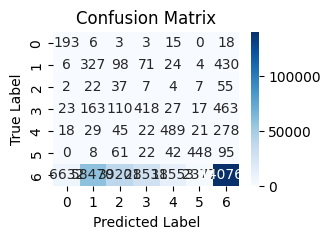

Resampled dataset shape Counter({6: 2587745, 5: 2587745, 3: 2587745, 0: 2587745, 1: 2587745, 4: 2587745, 2: 2587745})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.465509
Error Rate: 0.5344910343881784
Precision: 0.176070
Recall: 0.498818
F1-score: 0.150194
Selectivity: 0.881209
Balanced Accuracy: 0.498818
Geometric Mean: 0.662995


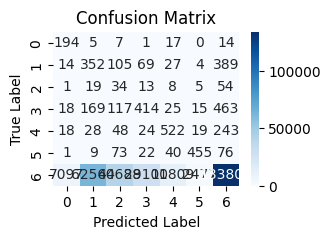

Resampled dataset shape Counter({6: 2587745, 5: 2587745, 3: 2587745, 0: 2587745, 1: 2587745, 4: 2587745, 2: 2587745})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.450890
Error Rate: 0.5491102958823328
Precision: 0.176084
Recall: 0.505353
F1-score: 0.148362
Selectivity: 0.880377
Balanced Accuracy: 0.505353
Geometric Mean: 0.667009


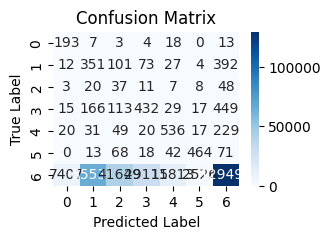

Resampled dataset shape Counter({6: 2587745, 5: 2587745, 3: 2587745, 0: 2587745, 1: 2587745, 4: 2587745, 2: 2587745})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.441430
Error Rate: 0.5585696163472418
Precision: 0.176685
Recall: 0.515961
F1-score: 0.148114
Selectivity: 0.880352
Balanced Accuracy: 0.515961
Geometric Mean: 0.673964


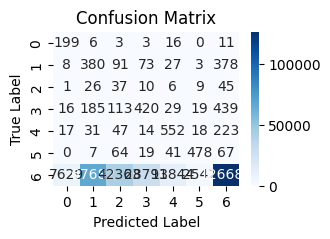

In [15]:
sm_list = []
from collections import Counter
for i in [3, 5, 7, 9, 11]:
    sm_list.append(SMOTE(random_state=42, k_neighbors=i))
for sm in sm_list:
    X_new, y_new = sm.fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_new))
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.925004
Error Rate: 0.07499571433469332
Precision: 0.264490
Recall: 0.467121
F1-score: 0.312282
Selectivity: 0.904366
Balanced Accuracy: 0.467121
Geometric Mean: 0.649960


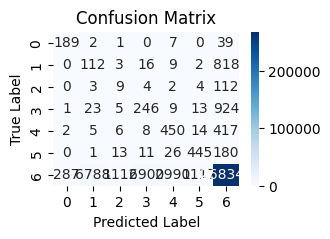

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.880039
Error Rate: 0.11996091473240311
Precision: 0.234822
Recall: 0.486242
F1-score: 0.277539
Selectivity: 0.904943
Balanced Accuracy: 0.486242
Geometric Mean: 0.663341


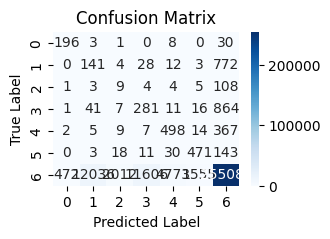

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.832396
Error Rate: 0.1676037988137279
Precision: 0.216376
Recall: 0.492934
F1-score: 0.250742
Selectivity: 0.903024
Balanced Accuracy: 0.492934
Geometric Mean: 0.667182


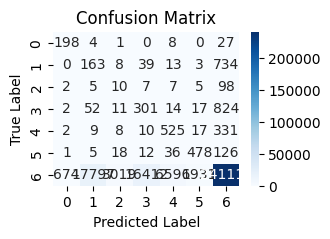

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.850177
Error Rate: 0.14982343058936465
Precision: 0.226193
Recall: 0.458903
F1-score: 0.261744
Selectivity: 0.899163
Balanced Accuracy: 0.458903
Geometric Mean: 0.642362


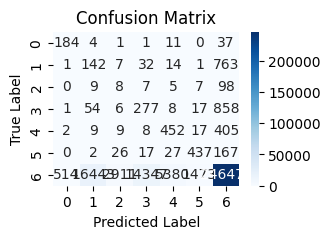

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.771934
Error Rate: 0.22806596496040044
Precision: 0.209832
Recall: 0.453273
F1-score: 0.234169
Selectivity: 0.890745
Balanced Accuracy: 0.453273
Geometric Mean: 0.635414


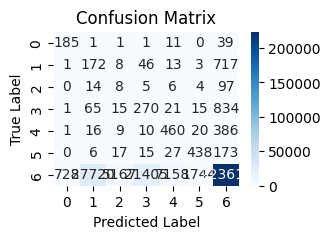

In [16]:
csm_list = []
for (i,j) in [(5,3), (7,3), (9,3), (7,5), (9,7)]:
    csm_list.append(CentroidSMOTE(k_neighbors=i, m_vertices=j))

for csm in csm_list:
    X_new, y_new = csm.fit_resample(X_train, y_train)
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)